<a href="https://colab.research.google.com/github/uzma-knpc/Generative-AI/blob/main/PICRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Now use google gemini embedding model for retriver
https://python.langchain.com/api_reference/google_genai/embeddings/langchain_google_genai.embeddings.GoogleGenerativeAIEmbeddings.html#langchain_google_genai.embeddings.GoogleGenerativeAIEmbeddings

# Face detection with embedding

In [1]:
!pip install -Uq facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166

In [2]:
!pip install -Uq pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.1.0 which is incompatible.


In [3]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

In [4]:
from facenet_pytorch import MTCNN, InceptionResnetV1

model = InceptionResnetV1(pretrained='vggface2').eval()
model

  0%|          | 0.00/107M [00:00<?, ?B/s]

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [5]:
# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)

# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)# ebedding important line
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None

In [6]:
!mkdir images

In [7]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import requests
import os

def save_image_from_url(image_url, image_name):
  """
  Downloads an image from a URL and saves it to the 'images' folder.

  Args:
    image_url: The URL of the image to download.
    image_name: The name of the file to save the image as.
  """
  try:
    if not os.path.exists("images"):
      os.makedirs("images")

    image_path = os.path.join("images", image_name)

    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(image_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

    print(f"Image saved to: {image_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")


In [8]:
save_image_from_url("https://media.licdn.com/dms/image/v2/D4E03AQEEn9DuNlQwvw/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1664654245747?e=2147483647&v=beta&t=NGB0a9aqsgdyxpbuO3rqws95ogJnL_6aRtBDS7IWPfw","s1.jpg")
save_image_from_url("https://avatars.githubusercontent.com/u/10209765?v=4", "q1.jpg")

save_image_from_url("https://media.licdn.com/dms/image/v2/D4D22AQFmuEiR8ttUmw/feedshare-shrink_800/feedshare-shrink_800/0/1711203894556?e=2147483647&v=beta&t=GEZGp_cdogNJCJIGidoEw_DjW2FXZcG4nUUlaNF1Zlc","z1.jpg")
save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBBiqefc7Le97Rn0udVVBkur7RlU53FcQh1A&s",'z2.jpg')
save_image_from_url("https://scontent.fkhi4-4.fna.fbcdn.net/v/t39.30808-6/468785380_10160566910882765_300507882801991935_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=6ee11a&_nc_eui2=AeEk77SJKagGymTo3ibNnnx9YsjCm8DJ0lRiyMKbwMnSVMJqs7YWsJDuzKzXyLHLoFk&_nc_ohc=QJMm9K-AE4QQ7kNvgFE0N2o&_nc_oc=Adi1r8eogMcuDIMMLJvliCOnaaXQ2KnUbbJvY94aAnfInkDB-fyB_1ZXBpDQnWTkZnY&_nc_zt=23&_nc_ht=scontent.fkhi4-4.fna&_nc_gid=AcSynbwc6ukNTxWnUzjhtEe&oh=00_AYCvnF-vj63T-X69PZgBk6JvVjepzybVukgHPSM_6BXkGQ&oe=678003A4",'s2.jpg')
save_image_from_url("https://i.ytimg.com/vi/7QD3GKvSyMk/hqdefault.jpg?sqp=-oaymwEmCOADEOgC8quKqQMa8AEB-AHOBYAC0AWKAgwIABABGGUgXChPMA8=&rs=AOn4CLB2EaZsLrClGHqUMUhApQ_sxAcF7Q","q2.jpg")

Image saved to: images/s1.jpg
Image saved to: images/q1.jpg
Image saved to: images/z1.jpg
Image saved to: images/z2.jpg
Error downloading image: 403 Client Error: Forbidden for url: https://scontent.fkhi4-4.fna.fbcdn.net/v/t39.30808-6/468785380_10160566910882765_300507882801991935_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=6ee11a&_nc_eui2=AeEk77SJKagGymTo3ibNnnx9YsjCm8DJ0lRiyMKbwMnSVMJqs7YWsJDuzKzXyLHLoFk&_nc_ohc=QJMm9K-AE4QQ7kNvgFE0N2o&_nc_oc=Adi1r8eogMcuDIMMLJvliCOnaaXQ2KnUbbJvY94aAnfInkDB-fyB_1ZXBpDQnWTkZnY&_nc_zt=23&_nc_ht=scontent.fkhi4-4.fna&_nc_gid=AcSynbwc6ukNTxWnUzjhtEe&oh=00_AYCvnF-vj63T-X69PZgBk6JvVjepzybVukgHPSM_6BXkGQ&oe=678003A4
Image saved to: images/q2.jpg


Error downloading image: No connection adapters were found for ''

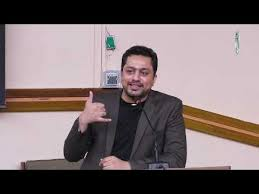

In [9]:
save_image_from_url("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxIQEhUSEhIVFRUQFhAVFhcWFRUVFxYQFRUXFhYWFxYYHSggGBolHhcVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0dHx0tLSstLSstLS0rKy0rLS0tLSstLS0rLS0tLS0tLS0tKy0tLS0tLS03Li03OCsrLSsrK//AABEIAMIBAwMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAAAQIDBAUHBgj/xABJEAABAwEDBgoECgkFAQEAAAABAAIDEQQhMQUGEkFRkRMiUmFxgZKhsdEyU3LSBxYkM0JDVLLB8BQVFzRzgpPC4SNEYqLxo2P/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/xAAhEQEBAAICAQUBAQAAAAAAAAAAAQIRAxIxEyFBUWEEIv/aAAwDAQACEQMRAD8A4aiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICldIzCYP0k3D5t/i1dQhibyRuCNTHb5nRfUccTeSNwV9sLeSNwRelfKqL6u4FvJbuCkQt5LdwQ6PlBF9YcA3kt3BOAbyW7gh1fJ6L6w4FvJbuCngW8lu4IdXyci+seBbyW7gqXxNp6LcRqG0IdHygi+rZIm3cVuI1DYqImtJcC1tzjqGGr8dyHR8qovq/gW8lu4IYW8lu4IdK+UEX1dwLeS3cE4FvJbuCHR8oovq3gW8lu4JwLeS3cEOj5SRfV3BN5LdwTgm8lu4IdHyii+rTC3kt3BRwLeS3cEOj5TRfVnAt5LdwTgW8lu4IdHymi+rOBbyW7gnAt5LdwQ6PlNF9WcC3kt3BQ6Ng+i2/mCHR8qIvqvgW8lu4KDC3kt3BDo+VUX1TwLeSNwRDo5BmD+9H+G77zV1GBcvzAHyo80b/vNXUYVb5aw8MuNZDQrEavhGlSrAVKkFBUiIiUREUQVEuHW3xCrVEmHWPFFimXV7X9rl57K2XGWeWhrpCuqoLSXNobxfpAn/1egmxb7Z+49c8zni+USmtSCCG6yHG8Dnqa02V2LWLz/wBfJnx8e8PL31htYlYHjBwBGq4gHC/btWSvOZmz6UAaQQYy4EEU+kSPzzL0SldeLK54TK/IVC1+VsvWay/PzNYTg3Fx59EX0Wphz+sDruGoedrh1qOm3pkWPYbdFO3Tie17drSDfz7FkICKVCCCoVShASilEFKKpEELXWo/KIRU31FKGhJNam7UGml62NFjW2McR/0g9u6oH9yMcnhkIpIUURtCKaKEHG8wB8qP8N33mLqkIXLvg9/ej/Cf95q6lCrfLOHhlMVwKhqutUaVBS1QpagrVKqUFBAVShSiewqJMOsKuipk/EIsW5sY/b/setXbclwyvcZC7jEggPc2uOppxp3Laz4x+2fuPURx8YkbfPzQYeS8lR2duiwUqak6ycLzruAHUvP5/Z2foTOCiNJ3gEGgOhGTTSvuqaGgXsSuN5wt/SMrysdQhr4mj2WxsqN+kifkeXlgtVpJkIfIXYuxJPPrKsyWGYCronAC4nRIXb7HYWUuAbW/ACqqnyYHDUVz711nBL8uF2a1yQuDmvc28XglpFMDcu1Zj51i3NMbq8LE0Em6j24Fwpga0r0rzuceSIeDfWNtQDq1rSfBc4syg1oOMU7XbCLneLQtY5bc8sOlm3ZioVSLQpREQEREBERAVl7eODStxHRe03jWKDfRXkRLNwCgqURVKKpEHG/g9/enfwn/AHmrqUK5b8H/AO9H+G/7zV1KFW+WcPDLarrVaYrwCjSVWFFFUECiUUojKEopRAoqJNXSFWqXjDpCNLc1xZ7Xi1w/HvVJtUbSQXC49PgreUsB0nwWgtmUxZw0mMEOB41G10tIjRvGy/oaRrWscZfLOWWnpTbIzSjxf0rmULWtntloIvdPIwOcK0YKGoGw1/6r0Nmy2JzRsejQNq7ig1qLqADUHHG6it2WBmlI15FHOce9Tkkkb4P9X3aqzZzPaRouZK2oBAaWuBOokraZXzi0CGCE6bgCG6VO9XI8nQNc1ofXSdW80FRsGtY+U8lttMr2uLQaUbXX0EYG9c3q61gyW7hOLJHo6WI0g6/ZULT/AAa2F36zkNDowxzX87nMa0dYLty3LsjCAuLjVx1VNB0BZ/we2V7XzyUGjOSa/Sqw6LR0en3KY33sc+XG2Tb21EVShdHBSUoqlCCFKUSiCKKFUoIQQimiUQQimiUQQimiIOOfB8PlR/hu+81dThZzLh1ktD4ySxxaaUqCQaEjYskZZtA+uk7bvNTky6045uO6MYrzWFcJblu0evk7bvNVDLc/r5O27zXL1fx09P8AXdwxTorhX65n9c/tu81DsrzH6156Xv8ANPW/D0/13bRKaC4QcqS+sdvcqTlGT1jt5T1vw9P9d50U0VwF9uk1vcesqgWp+oneU9X8PT/X0CRzq3I4XXjHaFwM2mQ0Gk6gwFTQLZW2wcHZoLQ17iZdIPacGuvoW81AtTO34PT/AF13KczQWVIoKl1+AupvvXkcs2YTFp0iODDhcGmpLq1qXDbSlFzqWcvFHXg6v/VjGxxcgbgumGdnw454y/Lpub+T2Mkq55po6J+bFQXMvFHnk7NatZXe2N72g8YgPadukDS/pqOpc4jgY01DACL601ra2eN7YRPiS8mn/wCYoKDm4pPWnJe0a4r1vs3bLLPIaSivB00SHjAip+jUH81VqC1uszyGxvOlTSJq4UqOMHVor/6zs9oo7hXxGlBoOxdz1BFFi5WytFEykby5x1k39Kz8PReSa23Ftme+pJreAOc7F7fN+xmGFocKON7gaXG+65cTlyrKS0hxbQgtINKFpB0hz1ovQ5O+Ee2sIEgjmaMSW6Dz/Mzig/yqY4/Lnycu3XUXksl/CBZJaCTShJ5Y0m19puA6QF6izWlkjdKN7Xt2tcHDeFtz2uFAEUoCgqVCCEREBERARQUQSiiqIOA5PiaSS+oaBU0rXEAYLbxRWTWXnt+a1QlaRdG1pOsONfBXY6bV5+fP33HXh9sdNy2OwjU/fJ7yuaNgP0Hb5PxctONHlK4A3ldy8tyrv2jZgWIfQdXoJ7tK9WqWXZ/8x+L1h0btO4qaD/l2Sp3z+jtGyjmsIF8JPPojzVX6TYvs/wD1b7y1gZzP7J8lPBHU2TsO8lN5neNmbXYvs1eljPNUm32Mf7VvZjWt4B/q5D/K7yU/orz9VJ2HeSv+/pe8bvJk1lmkbG2yMq7WWx0A1k3allZ35Oe5kMUMbiGlxo1twoBTC4YlY+aVhcJDIWuboinGBFSdlehe1MoAqRVevhtk3WMv9TTktoyVKwVfE9o20u3rE0F1a0zODbqX1xAuHRrXMrZHoSObUGjnXjA36l6Mbt5eTj6+7EcKAnmKyMhZxsbEIJ7gBxX0uofou8+ZWrRcxx5j4LQmIK5YyucyuN3G3yjZ4CeEjkjNKkgObU9VVS6KCJ1ZXh1Gg0YCeMQCG1GNxx5liZPyvPZg4QzyRiS5wYaaXSsRoDzQ1q41Os7ST03rMx0vqT6boScJx9HRbQBrdjdXX5q0H0uAxWWwXCmF1OhUTNAJOvDrWmd7WQ0krJs5fGdJjnMcMHNcWkdBCmNmiL8cVS9+rWbzzN1qj32ZWd80krLNPx+EqGPuDqgE8blVpSuPSugEL5/ssh4VrmkjRIoQaHqIwXsLDnPaosJnOGyTj9543evPy8047Nu3Hjco6gi8bZM+z9bB1xu/td5rdWTOiyS/Whh2SAsv9o8U9RTHmwy8VbhY26USMhwq0gg6wajeFJC6SopUkKUV2ilQqioTYiiKUTY8xZskRj6tvZCzosnRj6tnZC2fBBTwaahvbFZYo/Vs7IV9tkj5DeyFd0VIV1BbFmZyW7gqxA3kjcFcClE2tiIbB3KeCGwblWgQ2oMY2LByvlCOztbpelIQ1jdZcSL+YCt58wtl3c645l3Lf6TbxI01a17WR8zGnEDnNT1po37ugaVRpE1JrerT7SG68ML7qrT5Syg6KMm64EjoXO5c5Z5SeNo+ysad8uSY+XVcpSz8EXQtDydQe1p6q4rwGULLapJHSvgeLqmjSQABj3YrVxZWnH1z96uNyxO6oMr6UpStLjiLtS1I5Z545LFsk4h6h3rUkrMyi/igbT4LBBPWum3nUlbLI1nvLtgp1n/CwFvclspGOe/f/hQTBxNJvJvHsn/N3WFS6g4x/JU2vEOH0MfZOPmrcjtJ4AwF6Kuk7ecnoWO4kCpHpm/o1NFMVXb5NFtOUQOpW479teipI8Goq/k94bIxzxVtRpDaDiG9C9WbJA/0ZNE7H3X9Jp4rx5r+bz5Bb6CSrQa4gLwf2TWrp6v58vMZ0mRpBeAHDa0+dBuWHJC5hvBHT+CrjkLfRJb7JI7llx5UkwcQ4f8AIX06R5Lw7xen2rEstofGase5h2scW76Lc2TPG1R3Oc2QbHtoe02nfVYRtcLvTiLa/SYaivSKeCCxRP8Am5QeZ2P4HuXSZZTxTpK9TZM+oz87C9vOwh4r3Fbux5ess1AyZlTqcdA7nUr1Lms2SpW/RrztNe7HuWHJGRcR1EUO7Fdcf6c55c8uGfDs9FBC5LYsrzw3RyvaNlai7mNQtxY89rQz0wyQc40Hb23dy74/1YfPs53isdC0UXk2Z+x0vgfXmc099yLp6+H2nTJ6sBTRVIvQ4KaJRVKFFiFKIhRKIpCI8xn/AJZ/RrMWtP8AqWjSY3mZTju3ED+YLj0Fs4KQSUBLamhwvBGrpr1BbjPXLTrVaXuwbGTGwbGtJv6TivMTO2KsWttlXOV08bY6UIaA87XUvpzLzrH0J6lepQKwahwH+Uhct1tYG6Qqsizx4nnVuzGjVmWX0eklVGtyliBsBPf/AIWHgr2UJayOGyg3D/KsE05ykRUKnDEr0cdGt5mjwWhsLKvaOeu5be0uvDegnoGA/OxFinhbuc3npKxIyWXjXt1cyzHXLDdV1+oEjruQql79N7QTtK2TWnUd4Woaf9QU1C5bQSgXGpOwCqBKKXeC6hm3kSz2mxQOfG0nQoXC51WuIN46Fy/SBwrXYbvFdX+Dd9bCwcl8w3vLv7lmzbeN1WNa8yG/VSubzOo4LTWrNa0s+i142sNDuK6TRCFwy/nwvw6zOuO2myPbc5rmH/k0jvwWOWHYCF2aSFrrnAHpvWptmbFmkqeD0SdbTonuXG/y/VdJy/bmkNqewcV7m82I3FZrMsPIpI1kg3Hy7l6K2Zj64pT0OAI3rSWzNi1R4xh42sP4FccuDknxt1nLFoTWZ+LXRnaLx3V8FUMmtffHI1/Nge7yWqlicw0c1zabRRUh2u7wXKyzzG+2NbF2Sn8nvHmixW2yQXBz+px80WfY/wAuyqURfcfPRVFNEooIRToqkyNH0hvCgkq1apNFj3DFrXu6wCfwVq0ZSgZ6c0bfae0eJWJPl2yEOabTFxgQeOMCKIOCzPrft8Viucr9sjMbiwmugSK6iBcCOY4rCe5Vzqt192KiyxVNVtMlR8CySZwIfoaMIcCDwkh0XSDZoNDqHa5uyotWWLuQ0uNFyzIHAMrsqfxUWewvkroMLtEVNATQG4E7L16KyZkzyx8d7YwR7Rp3DvS2RrHG5eHPa1JOJcSVWxlLyvV5dzHnsw0ozwzRjQaLuzrHQvKuJrTWLiNYI1EKy7Zyxs8s7JLeM5x1D8+Cy2GpLtvhqWNZRRgHLJJ6MAFfdJRCLVsloqYh/p43aR0hsJFBvv3BWZ4HnVdtV+Bv+m9pxLoj4hIixYQC555NB+K2ULgBhRYsNhp17VlCz0Fw/PNsRUvJOzpN+6i6f8F5+RmuqWTwauVadLtx28xG1dW+DBvyMnlSyHcGj8FGsXrlClFGkKURRpCEKVCosz2djxRzQ7pAK0tszSssl4ZoHawkL0BChS4yrLY8Q/4PmEmkz+5F7dFj0sfpe1VqlzqL50/aNlT7W7+nF7ig/CJlQ/7t39OL3F124dnaM78tSQxgwu0TpX3A3U5+deJOWJbQA+SR1S1laEtGA1DaaleBtmd9tmFJJy7+WMeDVhxZctDRRshA6G+SzWrnNOivId6VXe0SfEqng28kblz/AOMFp9adzfJPjDafWnst8lNJ2dDawamjcFVpLnfxitXrT2WeSj4w2n1p7LfJOp2e7tlijlpptrTXeDvCsQZIhYQ4Rio2kkdNCV4v4w2r1p7LfJPjBafWnc3yTSbj0uUn8I/mbcPz+cFjxx0XmzlWbl9zfJP1tNy+5vkt7Tb3uRLY2IivpPc1pxuZdeNpr4BdKsTBQU0iNRfcekB146gvnqPLE7SHCQgtNQaNx3LZNz2ygMLS7sx+6sWbdsObrNO6PjxBNVrZ8hWeY1kiY47SBXfiuP8Ax6yj9pd2I/dUjPrKI/3J7EXuqdW7z434eqy9kkQyuYBdcR0LXgUFCAV5i2ZzWuZ2lJMXGlK6LBd1BWP11P6z/qw/gukrz2zb1tjsznuLGuDQGl3o1uBwxV205JZGKumIqKm4C5t41ryMWX7Q30XgVFPm48Oyq35y2p2MgPTHEfFq1MpGXrsnWKORpLZn3HDinxxHQsQS6ibxUdYJC823OS1BwcJKECgoyMXVrgG0V4Z223157EfuqXKLNNqRiNfjsK7LmNZxDYYATQuaZDW75xxfgeYhcF+N1t9eeyz3VBzstvrz2We6s7alj6WNoZy27wqHWyMYyM7TfNfNnxstnrz2We6hzstvrz2We6p7r2xfSByjD61naCpOVYB9Y3v8l84fGu2evPZZ7qHOu2evPZZ5J7r3xfRjcswFzWCS95DRxXXuPUtgvmSPOy2Nc1wnNWEOB0IzRwwIq1Z/7Rsqfa3f04vcVS5z4fRZUL51/aNlT7W7+nF7iftGyp9rd/Ti9xDu+ikXzr+0XKn2t39OL3EQ7vKoiI5iIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP/Z","q2.jpg")

In [25]:
# Example usage
image_path = "./images/q2.jpg"
q2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", q2.shape)
print("Image Embedding:", q2)

Image Embedding Shape: (512,)
Image Embedding: [ 0.00058278 -0.01463297 -0.10330155  0.03984535  0.08525636  0.08029363
 -0.01011138  0.04867227 -0.00259888 -0.0077198  -0.0331905   0.06225294
  0.01708761 -0.00982595 -0.01638006  0.00054205  0.04426373  0.00519726
  0.04448376 -0.08979201 -0.06033407 -0.00162232  0.09186839  0.03262272
  0.06873461  0.02532319  0.03512866 -0.05809444  0.00151727  0.05172818
 -0.04107905 -0.03755797 -0.04134395 -0.00761167 -0.00674731  0.04443471
  0.00570058 -0.02845279 -0.12002273  0.05528227  0.00132485  0.00437373
 -0.02495593  0.01842853 -0.00357915  0.01889837  0.02980521  0.10357354
 -0.11238679 -0.02633037  0.02794239 -0.0152881   0.04015452 -0.0039458
 -0.09202526  0.0715652  -0.03382103  0.07384298  0.01921727 -0.04263638
  0.02758526  0.03841295 -0.04435986 -0.05347932 -0.04511738  0.03700717
 -0.00194125 -0.00450149  0.03157888  0.02796174  0.02416223  0.01202647
 -0.00905218  0.00880154  0.0189873  -0.01363976 -0.0499587  -0.01557556
  0.0

In [26]:
image_path = "./images/z2.jpg"
cat2 = create_image_embedding(image_path)

# 'embedding' now contains a dense vector representation of the image
print("Image Embedding Shape:", cat2.shape)
print("Image Embedding:", cat2)


Image Embedding Shape: (512,)
Image Embedding: [ 2.89454460e-02  3.42947012e-03 -2.74505597e-02  7.37803280e-02
 -4.99105752e-02  5.99015020e-02 -5.80016971e-02  9.61501990e-03
 -3.76116224e-02  6.68167919e-02  3.29056494e-02  7.69131184e-02
 -2.71448866e-02 -7.38206208e-02 -6.41608890e-03 -1.75792407e-02
 -2.86509236e-03  2.43324263e-04  2.99515016e-02 -6.26092330e-02
 -9.17221606e-02  5.20209968e-02  7.77745945e-03 -9.54604298e-02
 -3.56662348e-02 -3.14501068e-03 -2.61445008e-02 -2.82874722e-02
 -3.14870514e-02 -4.62670997e-03  9.74005926e-03  5.31971268e-02
  6.94989115e-02 -9.61332640e-04 -1.50304316e-02 -2.41529979e-02
  3.29998098e-02 -2.09973361e-02 -1.83389876e-02  2.21958589e-02
  1.38924932e-02 -3.18161473e-02  2.27779280e-02 -3.22516039e-02
 -4.14354913e-02 -1.07177757e-02 -4.29533934e-03 -2.32607424e-02
  8.63501430e-03 -3.14582288e-02  7.96774961e-03  9.41322092e-03
  4.40274179e-02 -1.76512506e-02 -2.90919878e-02  3.98665154e-03
  4.76254076e-02  6.09371029e-02 -5.0816565

In [27]:
q1 = create_image_embedding("./images/q1.jpg")
q2 = create_image_embedding("./images/q2.jpg")
s1 = create_image_embedding("./images/s1.jpg")
#s2 = create_image_embedding("./images/s2.jpg")
z1 = create_image_embedding("./images/z1.jpg")
z2 = create_image_embedding("./images/z2.jpg")

In [15]:
!pip install -U milvus-lite

!pip install -U pymilvus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.69.0
    Uninstalling grpcio-1.69.0:
      Successfully uninstalled grpcio-1.69.0


In [16]:
from pymilvus import MilvusClient
client = MilvusClient("./milvus_demo.db")


In [28]:
from pymilvus import MilvusClient
import numpy as np

client = MilvusClient("./milvus_demo.db")
client.create_collection(
    collection_name="images",
    dimension=512  # The vectors we will use in this demo has 384 dimensions
)

In [29]:
data = [
    {"id": 1, "person_name": "Qasim", "vector": q1},
    {"id": 2, "person_name": "Qasim", "vector": q2},
    {"id": 3, "person_name": "Shahzad", "vector": s1},
    #{"id": 4, "person_name": "Shahzad", "vector": s2},
    {"id": 5, "person_name": "Zia Khan", "vector": z1},
    {"id": 6, "person_name": "Zia Khan", "vector": z2}
]


In [30]:
res = client.insert(
    collection_name="images",
    data=data
)

In [31]:
res = client.search(
    collection_name="images",
    data=[s1],
    limit=1,
    output_fields=["id", "person_name"],
)
print(res)


data: ["[{'id': 3, 'distance': 1.0, 'entity': {'person_name': 'Shahzad', 'id': 3}}]"] 


In [32]:
q3 = create_image_embedding('/content/images/z1.jpg')
q3


array([ 4.13213260e-02, -4.12257537e-02, -4.85640280e-02,  8.31377208e-02,
        1.01976702e-02,  3.68293300e-02, -1.46719236e-02,  6.19783290e-02,
       -5.91493547e-02,  1.46885021e-02, -3.34651098e-02,  5.54549135e-02,
       -6.72142282e-02, -3.94235477e-02, -1.63801000e-04, -5.03926426e-02,
        2.62739994e-02,  4.74046730e-02,  3.61066163e-02, -6.31635487e-02,
       -2.17996519e-02,  4.15861122e-02,  5.36296144e-02, -6.42227614e-03,
       -2.03788150e-02,  2.21707057e-02,  7.35849887e-02, -8.34209844e-03,
        2.49388977e-03,  4.28047106e-02, -2.47200374e-02, -3.28146629e-02,
        2.11427044e-02, -3.63893174e-02,  2.45522847e-03,  5.57395490e-03,
       -2.76907776e-02,  3.27852443e-02, -5.06549664e-02,  3.23364437e-02,
       -1.32964998e-02,  5.83093241e-02,  7.81812798e-03, -4.01928276e-02,
       -1.82906035e-02, -3.59048042e-03, -1.78104310e-05,  6.43723309e-02,
       -1.18468158e-01,  1.72078740e-02,  3.10945287e-02,  4.88435663e-02,
        4.45353575e-02,  

In [33]:
res = client.search(
    collection_name="images",
    data=[q3],
    limit=2,
    output_fields=["id", "person_name"],
)
print(res)

data: ["[{'id': 5, 'distance': 0.9999998211860657, 'entity': {'person_name': 'Zia Khan', 'id': 5}}]"] 
